In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Aggregation

The dataset is a CSV file called `World_Happiness_2015.csv`. Here are the descriptions for some of the columns we'll be working with:

* Country — name of the country
* Region — name of the region the country belongs to
* Happiness Rank — the rank of the country, as determined by its happiness score
* Happiness Score — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
* Family — the estimated extent to which family contributes to the happiness score
* Freedom — the estimated extent to which freedom contributes to the happiness score
* Generosity — the estimated extent to which generosity contributes to the happiness score

In [ ]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
happiness2015.shape

In [ ]:
happiness2015.head()

In [ ]:
happiness2015.info()

**Using Loops to Aggregate Data**

First, let's visualize the happiness score of each country in happiness2015:

In [ ]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))
plt.show()

# write similar code using matplotling using plt.bar()
# delete below image after (self) running in colab

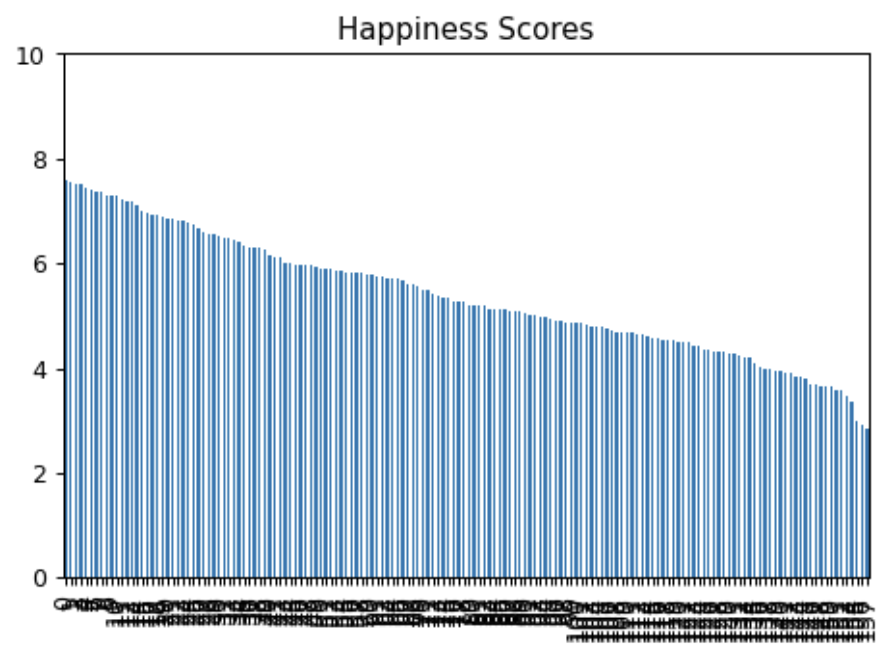

* Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

* You may have noticed that each country in the happiness2015 DataFrame is assigned to a region, specified in the Region column. We can use the `Series.unique()` method to confirm the unique regions:

In [ ]:
unique_regions = happiness2015['Region'].unique()

Let's try plotting only one region:

In [ ]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

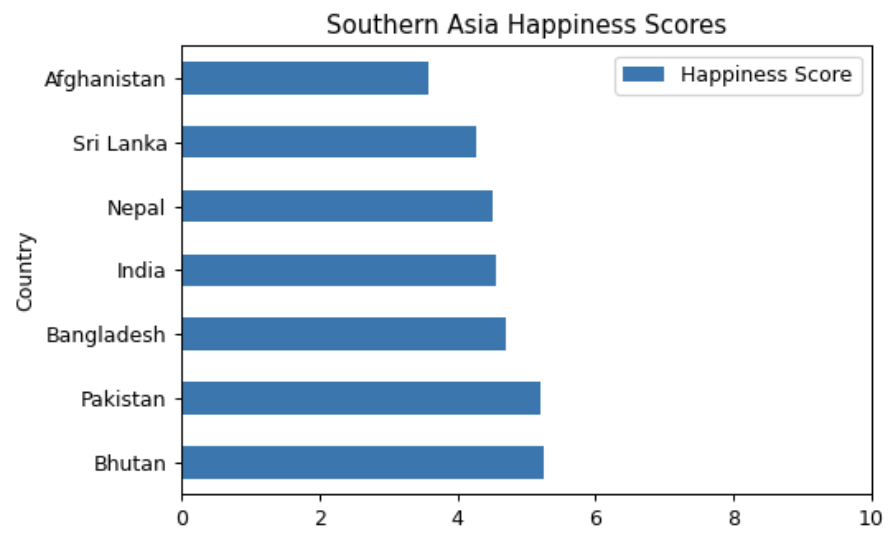

It's much easier to read this visualization — we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is a visualization that uses one number (a summary statistic like the mean) to summarize the data for each region.

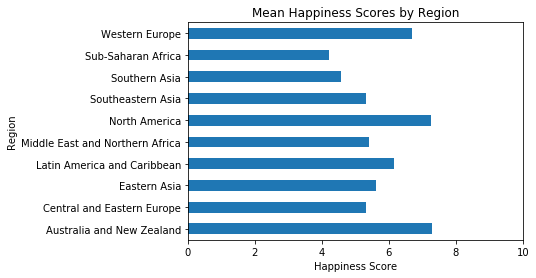

In [ ]:
mean_happiness = {} # dictionary containing the mean happiness of a region
for region in happiness2015['Region'].unique():
    region_group = happiness2015[happiness2015['Region']==region]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[region] = region_mean

**The GroupBy Operation**

Let's break down the code we wrote on the previous screen into three steps:

* split the DataFrame into groups
* apply a function to each group
* combine the results into one data structure

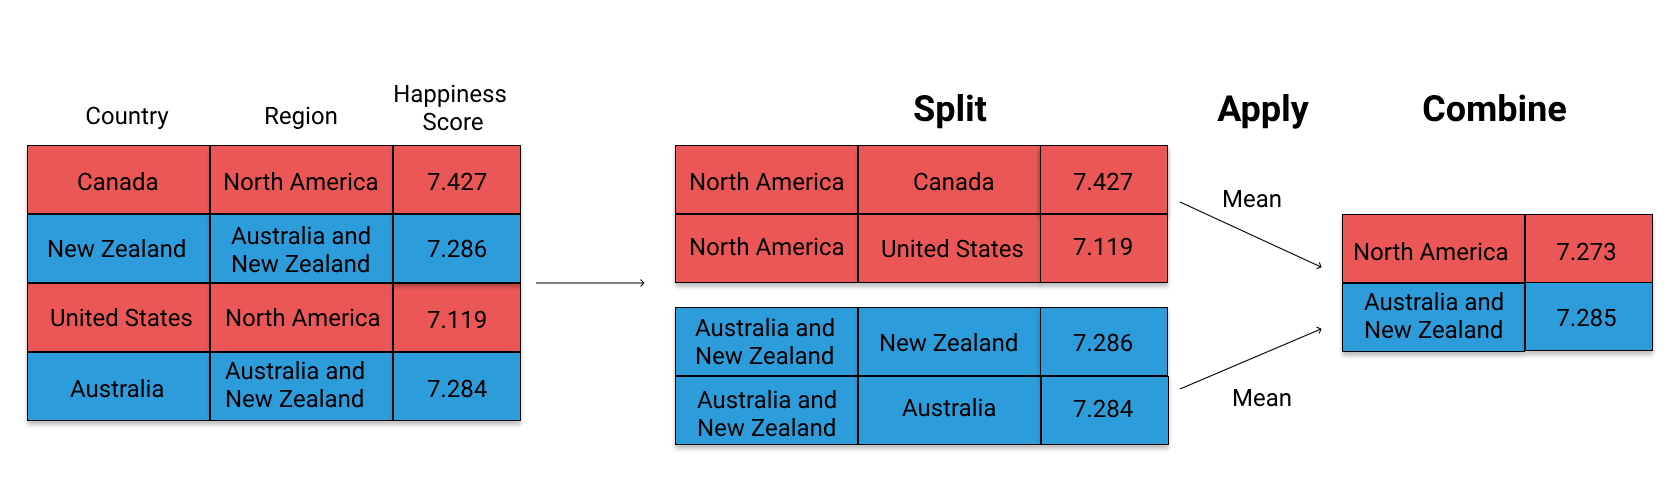

* As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a DataFrame, but it condenses it into two steps:

 * create a `GroupBy` object
 * call a function on the `GroupBy` object

* The `GroupBy` object (distinct from a DataFrame or series object) allows us to split the DataFrame into groups, but only in an abstract sense. Nothing actually gets computed until a function is called on the `GroupBy` object.

* You can think of the groupby operation like this. Imagine a DataFrame as a structure made of stacking blocks in all different colors and sizes.

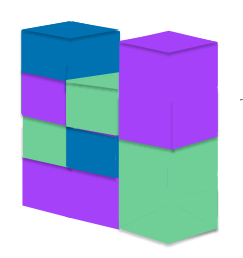


You know you'll eventually want to group the blocks according to color, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the `GroupBy` object, containing information on how to group the blocks by color and where each block is in the original structure.

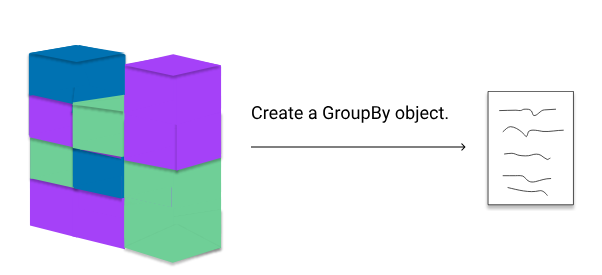

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

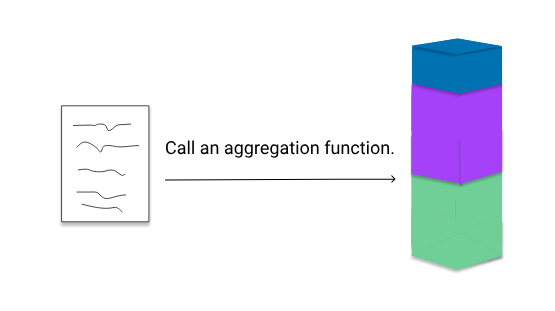

Combining all...

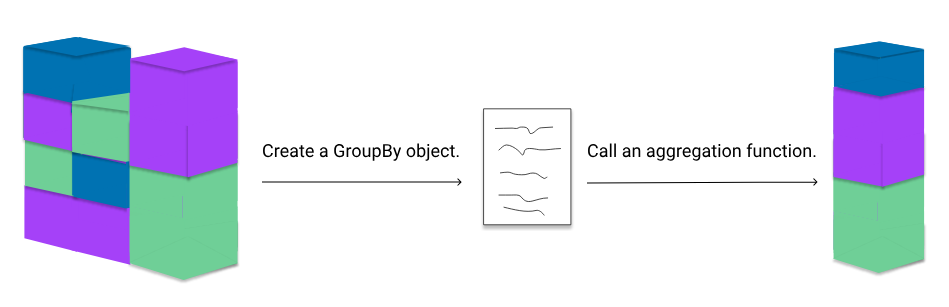

* To create a `GroupBy` object, we use the `DataFrame.groupby()` method: `df.groupby('col')`

* `col` is the column you want to use to group the dataset. Note that you **can also group the data set on multiple columns by passing a list** into the `DataFrame.groupby()` method.

* When choosing the column, think about which columns you could use to split the dataset into groups. To put it another way, look at columns with the same value for multiple rows.

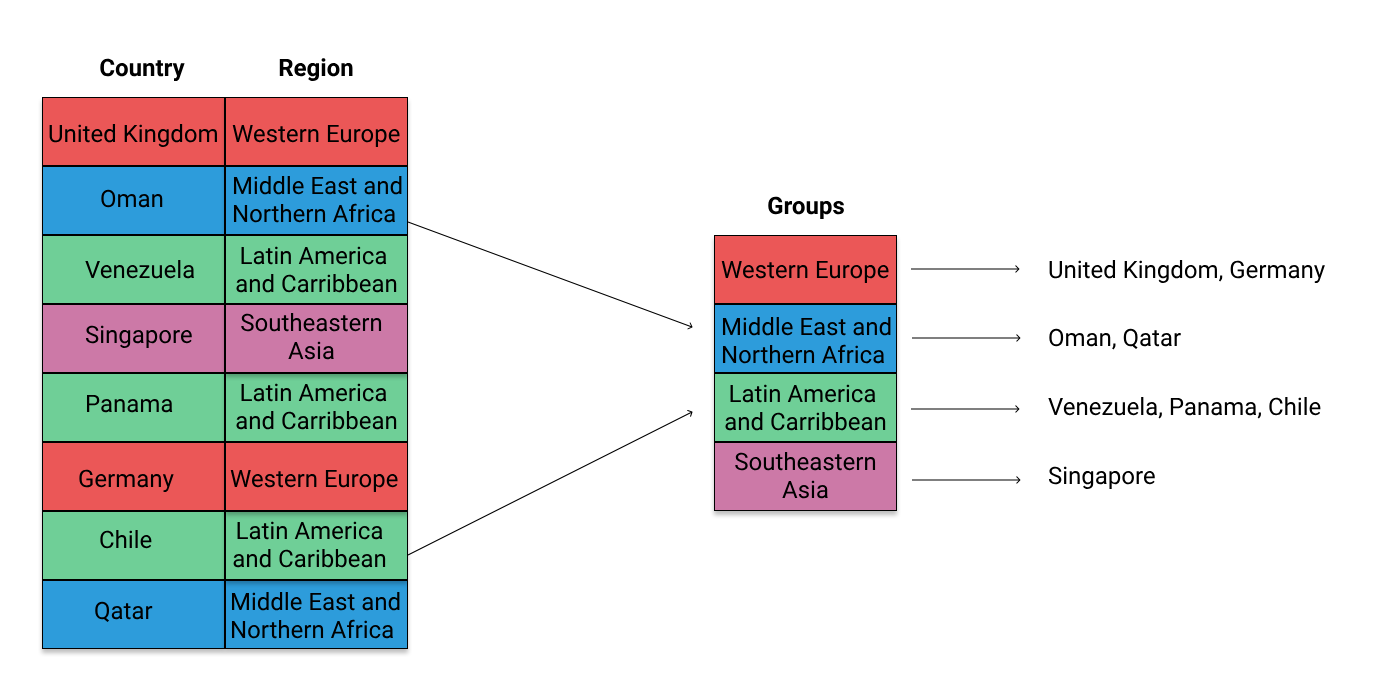

We can see from the rows above that the Region column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire DataFrame with the `Series.value_counts()` method:



In [ ]:
happiness2015['Region'].value_counts()

* Since there's a small number of groups, and each group contains more than one unique value, we can confirm the `Region` column is a good candidate to group by.

* `print(happiness2015.groupby('Region'))`

* This returns: `< pandas.core.groupby.groupby.DataFrameGroupBy object at 0x7f77882fa470 >` - This is telling us that an object of type `GroupBy` was returned.

* To select data for a certain group, we can use the `GroupBy.get_group()` method.

* For example, to select the data for just the North America group, we'd pass 'North America' into the `get_group()` method:
 * `grouped = happiness2015.groupby('Region')`
 * `grouped.get_group('North America')`

**Common Aggregation Methods with Groupby**

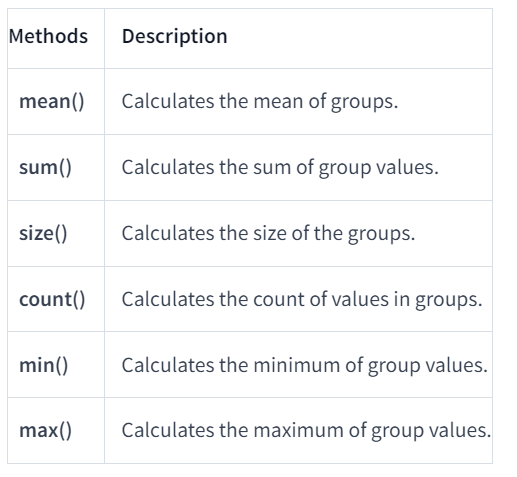

In [ ]:
grouped = happiness2015.groupby('Region')
print(grouped.size()) # returns a series

In [ ]:
grouped = happiness2015.groupby('Region')
print(grouped.mean()) # returns a dataframe with the mean value of each column (feature) for every group

You may have noticed that Region appears in a different row than the rest of the column names. Because we grouped the DataFrame by region, the unique values in Region are used as the index. Up until now, we've mostly worked with DataFrames with a numeric index.

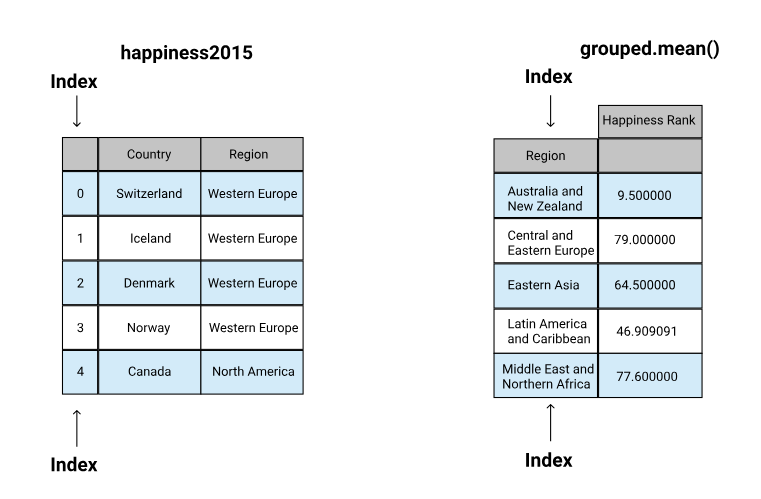

* In some cases, we may want to only aggregate one particular column in the original DataFrame. GroupBy objects actually support column indexing, just like DataFrames. You can select specific columns for a GroupBy object the same way you would for a DataFrame:

 * Single Column: `GroupBy[col1]`  
* Multiple Column: `GroupBy[[col1, col2]]`

In [ ]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

* However, what if we want to apply more than one kind of aggregation to a column at a time?

* For example, suppose we want to calculate both the mean and the maximum happiness score for each region. Using what we've learned so far, we'd first have to calculate the mean, like we did above, and then calculate the maximum separately.

* Luckily, however, the `GroupBy.agg()` method can perform both aggregations at once. We can use the following syntax: `GroupBy.agg([func1, func2,...])`

* Note that when we pass the functions into the agg() method as arguments, **we don't use parentheses after the function names**. For example, when we use np.mean, we refer to the function object itself and treat it like a variable, whereas np.mean() would be used to call the function and get the returned value

In [ ]:
happy_mean_max = happy_grouped.agg([np.mean, np.max])   # can pas .agg(['mean', 'max']) too alnd it'll work

# above code can be combined into 1 as
## happiness2015.groupby('Region')['Happiness Score'].agg(['mean', 'max'])

* Our result is a DataFrame containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves. Because `np.max` is an alias for `np.amax`, the column for the maximum is named `amax`.

* The `agg()` method allows us to create custom aggregation functions, giving us much more flexibility in how we can transform our data.

In [ ]:
def dif(group):
    return (group.max() - group.mean())

mean_max_dif = happy_grouped.agg(dif)

In [ ]:
# the code can alse be combined into 1 as
happiness_mean = happiness2015.groupby('Region')['Happiness Score'].agg(['mean', 'max'])

* When you printed happiness_means, you should've seen that the values in the Region column are the index of the resulting series and the Happiness Score column contained the values that would be aggregated:

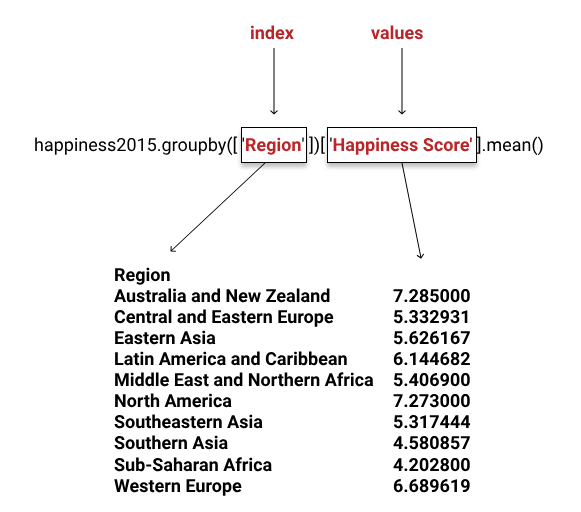

* `Index` and `values` are actually arguments used in another method used to aggregate data — the `DataFrame.pivot_table()` method. This `df.pivot_table()` method can perform the same kinds of aggregations as the `df.groupby` method and make the code for complex aggregations easier to read.

* Below, we use the `df.pivot_table()` method to perform the same aggregation as above.

In [ ]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

* Keep in mind that this method returns a DataFrame, so we can apply normal DataFrame filtering and methods to the result.

* For example, let's use the `DataFrame.plot()` method to create a visualization. Note that we exclude aggfunc below because the mean is the default aggregation function of `df.pivot_table()`.

In [ ]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

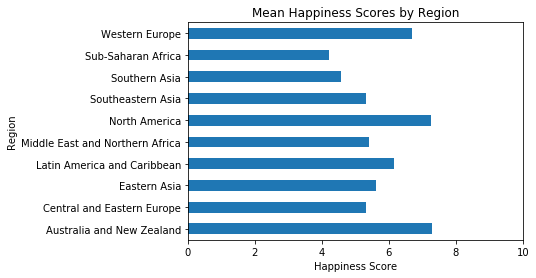

* When we set the `margins` parameter equal to `True`, `All` will be added to the index of the resulting DataFrame and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, `All` is the mean of the `Happiness Score` column.

In [ ]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region', margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

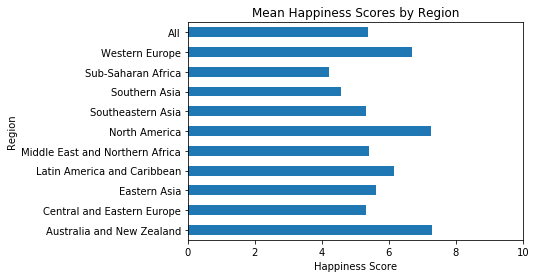

* The `pivot_table` method also allows us to aggregate multiple columns and apply multiple functions at once.

* Below, we aggregate both the "Happiness Score" and "Family" columns in happiness2015 and group by the "Region" column: (similar to the `GroupBy` method)

In [ ]:
grouped_by_region = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

Comparing `groupy` method and the `pivot_table` method:

In [ ]:
happy_family_stats = happiness2015.groupby('Region')[['Happiness Score', 'Family']].agg([np.min, np.max, np.mean])

In [ ]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', margins=True, aggfunc=[np.min, np.max, np.mean])

## Combining Data

* It's very common in practice to work with more than one data set at a time.

* Often, you'll find that you need additional data to perform analysis or you'll find that you have the data, but need to pull it from multiple sources.
* We'll use what we learned in the last lesson to analyze the 2015, 2016, and 2017 World Happiness Reports. Specifically, we'll look to answer the following question: *Did world happiness increase, decrease, or stay about the same from 2015 to 2017?*
* Let's start by reading the 2015, 2016, and 2017 reports into a pandas dataframe and adding a Year column to each to make it easier to distinguish between them.

In [ ]:
import pandas as pd

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [ ]:
happiness2015.head()

In [ ]:
happiness2016.head()

In [ ]:
happiness2017.head()

* Let's start by exploring the `pd.concat()` function. The `concat()` function combines dataframes one of two ways:

 * **Stacked**: Axis = 0 (This is the default option.)

 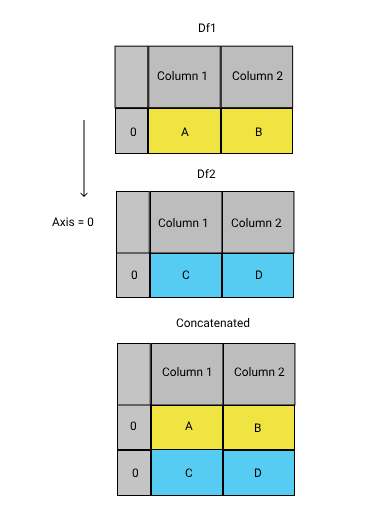

 * **Side by Side**: Axis = 1

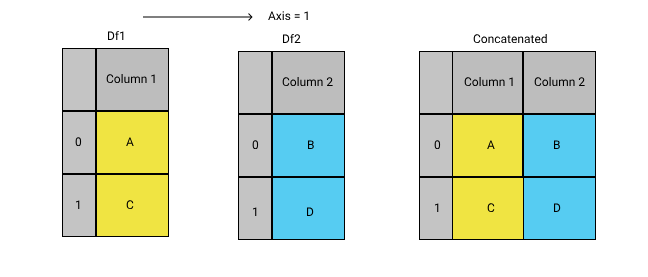

* Since concat is a function, not a method, we use the syntax below:

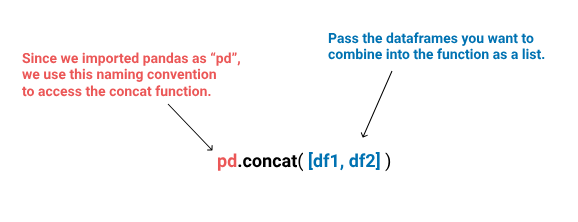

In [ ]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)

In [ ]:
concat_axis0

In [ ]:
concat_axis1

*  You probably noticed that we merely pushed the dataframes together vertically or horizontally - none of the values, column names, or indexes changed.

* For this reason, when you use the `concat()` function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together.
* However, what happens if the dataframes have different shapes or columns?

In [ ]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0 = pd.concat([head_2015, head_2016], axis=0)

* The function combined the data according to the corresponding column names:

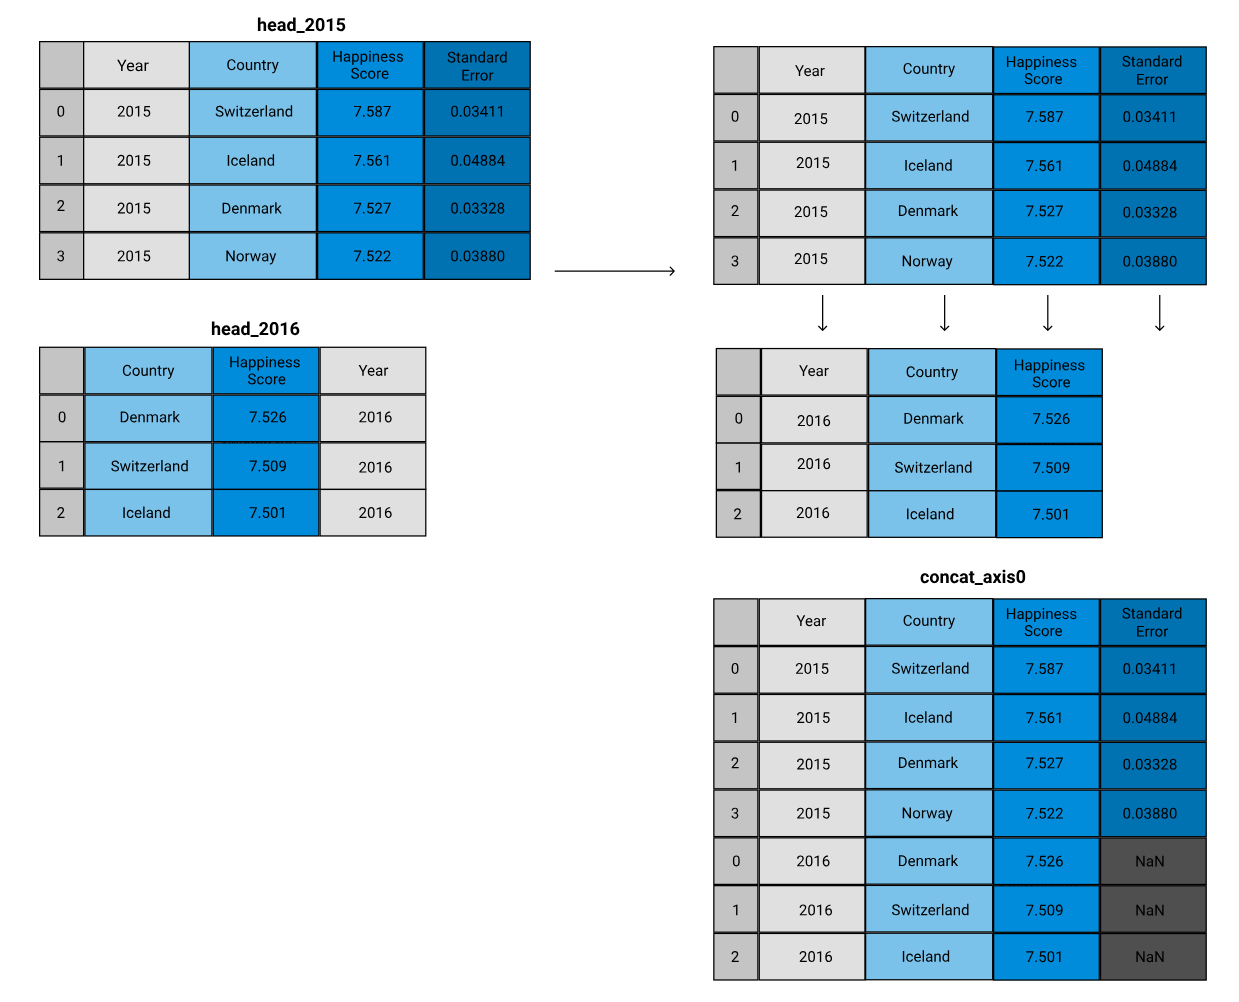

* Note that because the Standard Error column didn't exist in head_2016, NaN values were created to signify those values are missing. By default, the concat function will keep ALL of the data, no matter if missing values are created.

* Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

* Luckily, the concat function has a parameter, `ignore_index`, that can be used to clear the existing index and reset it in the result.

In [ ]:
concat_update_index = pd.concat([head_2015, head_2016], axis=0, ignore_index=True)

* Next, we'll explore the `pd.merge()` function - a function that can execute high performance database-style joins.

* Note that unlike the concat function, the merge function only combines dataframes horizontally (axis=1) and can only combine two dataframes at a time.
* However, it can be valuable when we need to combine very large dataframes quickly and provides more flexibility in terms of how data can be combined.
* With the `merge()` function, we'll **combine dataframes on a key, a shared index or column**. When choosing a key, it's good practice to use keys with unique values to avoid duplicating data.
* You can think of keys as creating a link from one dataframe to another using the common values or indexes. For example, in the diagram below, we linked the dataframes using common values in the Country columns.

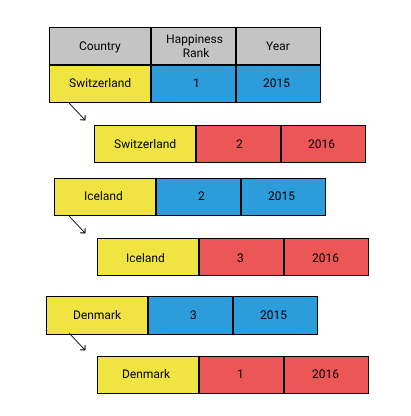

* In the diagram below, we use those common country values to join or merge the dataframes:
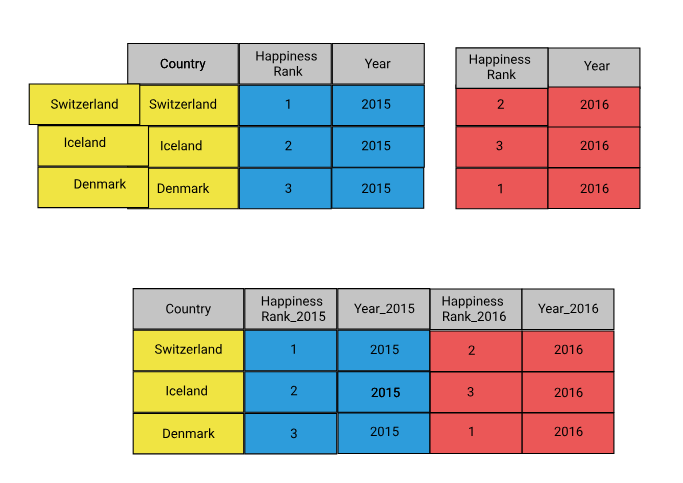

* We'll use the following syntax:

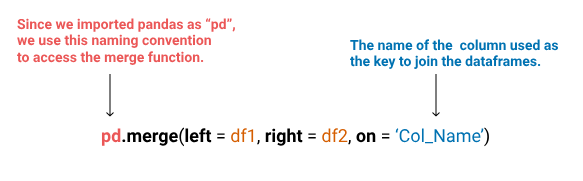

In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged = pd.merge(left=three_2015, right=three_2016, on='Country')

* Joining three_2015 and three_2016 in the last exercise resulted in a dataframe with just one row.

* Since we joined the dataframes on the Country column, or used it as the key, the `merge()` function looked to match elements in the Country column in BOTH dataframes.

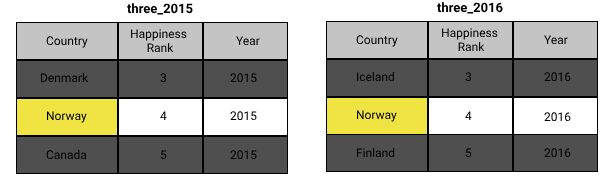

* The one country returned in merged was "Norway", the only element that appeared in the Country column in BOTH `three_2015` and `three_2016`.

* This way of combining, or joining, data is called an inner join. An inner join returns only the intersection of the keys, or the elements that appear in both dataframes with a common key.

* The term "join" originates from SQL (or structured query language), a language used to work with databases.

* There are actually four different types of joins:

 * **Inner**: only includes elements that appear in both dataframes with a common key. This is the default choice
 * **Outer**: includes all data from both dataframes
 * **Left**: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
 * **Right**: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes

* If the definition for outer joins sounds familiar, it's because we've already seen examples of outer joins! Recall that when we combined data using the concat function, it kept all of the data from all dataframes, no matter if missing values were created.

In [ ]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged_left = pd.merge(left=three_2015, right=three_2016, on='Country', how='left')
merged_left_updated = pd.merge(left=three_2016, right=three_2015, on='Country', how='left')

In [ ]:
merged_left

In [ ]:
merged_left_updated

* Since the Country column was used as the key, only countries that appear in BOTH dataframes have a value in every column. "Norway" was the only value in the Country column in BOTH dataframes, so it's the only row with a value in every column.

* can include a `suffixes` parameter in the merge function:

In [ ]:
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))

* We can also join columns using the merge function on index other than columns as we we earlier

* We'll join `happiness2015` and `happiness2016` on index using an inner join, so that the result contains only the elements in the key that appear in BOTH dataframes.

In [ ]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'))

* For the above dataframe we'll perform a **left** join on index:

In [ ]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
pd.merge(left=four_2015, right=three_2016, left_index=True, right_index=True, suffixes=('_2015','_2016'), how='left')

* Let's review our original question next: *Did world happiness increase, decrease, or stay about the same from 2015 to 2017?*

* To answer this question, we'll create a bar plot in which each bar represented the mean happiness score for one of the years. We completed a similar task in the last lesson when we calculated the mean happiness score for each region using the `df.pivot_table()` method:

In [ ]:
# First, let's rename the Happiness.Score column so it matches the column name in happiness2015 and happiness2016
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness2015, happiness2016, happiness2017], axis=0)
combined

In [ ]:
pivot_table_combined = combined.pivot_table('Happiness Score', 'Year') # 'Happiness Score' is the values and 'Year' is the index

In [ ]:
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))
pivot_table_combined.show()

## Transforming Data

* We explore another aspect of it that we haven't analyzed yet - the factors that contribute to happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

* You may recall  that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

 * Economy (GDP per Capita)
 * Family
 * Health (Life Expectancy)
 * Freedom
 * Trust (Government Corruption)
 * Generosity

* We'll work to answer the following question in this lesson: *Which of the factors above contribute the most to the happiness score?*

In [ ]:
# renaming the columns to make it easier calling them

mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }

happiness2015.rename(columns=mapping, inplace=True)

* Pandas has a couple methods that can be used to apply a custom function  to our data, starting with the following two methods:

 * `Series.map()` method
 * `Series.apply()` method

* Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

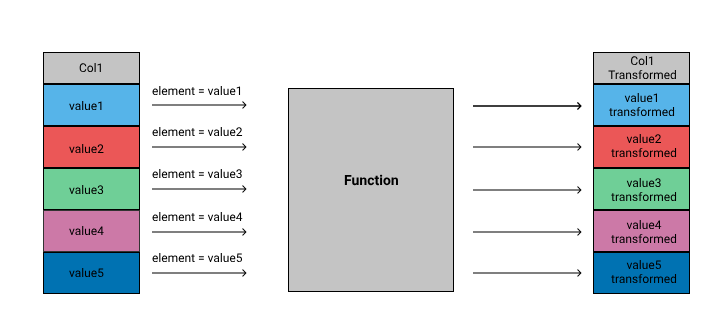

* We use the following syntax for both methods:

 * `Series.apply(funtion_name)`
 * `Series.map(funtion_name)`

* Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called transform, we'd pass it into the `apply()` method as follows:

In [ ]:
def transform(val):
    return val
Series.apply(transform)

In [ ]:
# Example

def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

equal = economy_impact_map.equals(economy_impact_apply)

* Note that these methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column.

* We recommend creating a new column, in case you need to reference the original values.

In [ ]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

* The difference between the methods is that we can't pass multiple paramters in the `map` function

In [ ]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_map = happiness2015['Economy'].map(label, x = .8)

`TypeError: map() got an unexpected keyword argument 'x'`

In [ ]:
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8) # have to specify x=0.8 since we dont pass it inside () paranthesis

* We use the `Dataframe.applymap(func_name)` method to perform transformations to multiple columns at the same time since the previous 2 methods only take in `series` to do element-wise transformations.

In [ ]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

* The apply method can transform dataframes given the function passed to it is an operation done on a series:

In [ ]:
factors_impact.apply(pd.value_counts)

In [ ]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den

v_counts_pct = factors_impact.apply(v_counts)

* In general, we should only use the `apply()` method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance.
* **When we use the `apply()` method, we're actually looping through rows**, so a vectorized method can perform an equivalent task faster than the `apply()` method.

**Reshaping Data with the Melt Function**

* It would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the Dystopia Residual column. We can accomplish this with the `pd.melt()` function.

* Here's a summary of the syntax we used to work with the melt function:

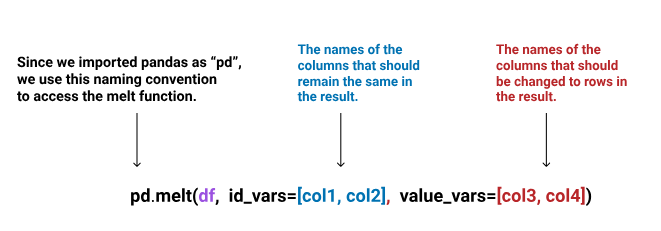

In [ ]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']


melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

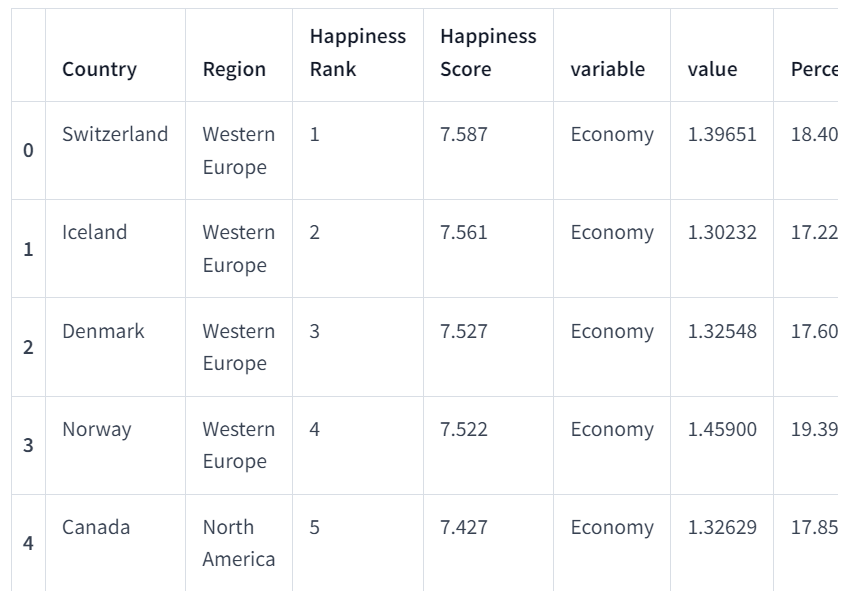

* The happiness score is basically the sum of the 6 factors. So we use the melt function to create a tidy dataframe with each of these 6 column value for each country (i.e, whatever is passed is `id_vars`) becoming a new row.

* Hence using the pivot table to groupby these `variables` (i.e, factors):

In [ ]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)
plt.show()

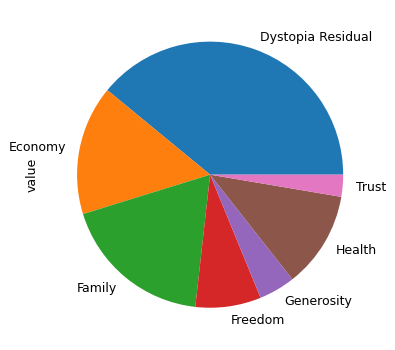

## Working with Strings

In [ ]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, left_on='Country', right_on='ShortName', how='left')
merged.rename(col_renaming, inplace=True, axis=1)

* Let's work with the CurrencyUnit column first. Suppose we wanted to extract the unit of currency without the leading nationality. For example, instead of "Danish krone" or "Norwegian krone", we just needed "krone".

In [ ]:
def extract_last_word(element):
    return str(element).split()[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head()

* We extracted the last word of each element in the CurrencyUnit column using the Series.apply() method. However, we also learned in the last lesson that we should use built-in vectorized methods (if they exist) instead of the Series.apply() method for performance reasons.

* Instead, we could've split each element in the CurrencyUnit column into a list of strings with the Series.str.split() method, the vectorized equivalent of Python's string.split() method:

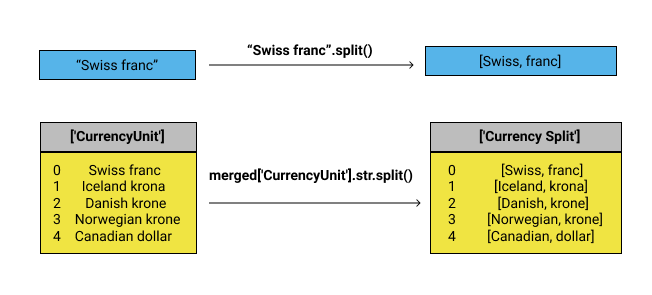

* In fact, pandas has built in a number of vectorized methods that perform the same operations for strings in series as Python string methods.

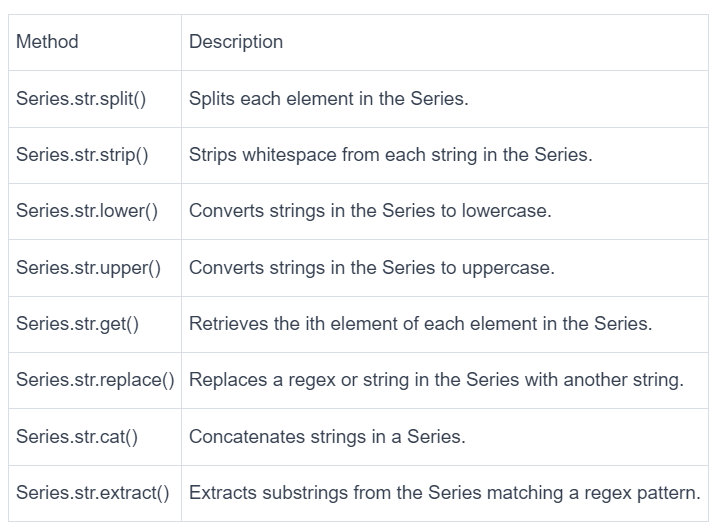

* The str attribute indicates that each object in the Series should be treated as a string, without us having to explicitly change the type to a string like we did when using the apply method.

* It's also good to know that **vectorized string methods can be chained**. For example, suppose we needed to split each element in the CurrencyUnit column into a list of strings using the `Series.str.split()` method and capitalize the letters using the `Series.str.upper()` method. You can use the following syntax to apply more than one method at once: `merged['CurrencyUnit'].str.upper().str.split()`

In [ ]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
# can't call last word in each row using series.str.split()[-1]; only works for individual strings
merged['Currency Vectorized'].head()

**Exploring Missing Values with Vectorized String Methods**

* Let's explore another benefit of using vectorized string methods next. Suppose we wanted to compute the length of each string in the CurrencyUnit column. If we use the Series.apply() method, what happens to the missing values in the column?

* First, let's use the Series.isnull() method to confirm if there are any missing values in the column

In [ ]:
merged['CurrencyUnit'].isnull().sum()

* So, we know that the CurrencyUnit column has 13 missing values.

* Next, let's create a function to return the length of each currency unit and apply it to the CurrencyUnit column:

In [ ]:
def compute_lengths(element):
    return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

* Then, we can check the number of missing values in the result by setting the dropna parameter in the Series.value_counts() method to False:

In [ ]:
lengths_apply.value_counts(dropna=False)

* Since the original column had 13 missing values and NaN doesn't appear in the list of unique values above, we know our function must have treated NaN as a string and returned a length of 3 for each NaN value. This doesn't make sense - missing values shouldn't be treated as strings. They should instead have been excluded from the calculation.

* If we wanted to exclude missing values, we'd have to update our function to something like this:

In [ ]:
def compute_lengths(element):
    if pd.isnull(element):
        pass
    else:
        return len(str(element))
lengths_apply = merged['CurrencyUnit'].apply(compute_lengths)

* Though it works, it is time-consuming since it loops through each row...

* Let's confirm the behavior of pandas' vectorized string methods next.

In [ ]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

**Finding Specific Words in Strings**

* Suppose we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string. For example, let's look at the SpecialNotes column. A number of rows mention "national accounts", but the words appear in different places in each comment:

* `April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.`

* If we wanted to determine how many comments contain this phrase, could we split them into lists? Since the formats are different, how could we tell which element contains the "national accounts" phrase?

* We can handle problems like this with **regular expressions, or regex** for short. A regular expression is a **sequence of characters that describes a search pattern, used to match characters in a string**:

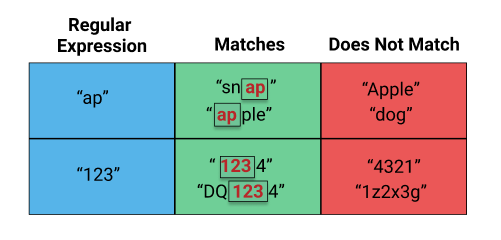



* In pandas, regular expression is integrated with vectorized string methods to make finding and extracting patterns of characters easier.

* However, the rules for creating regular expressions can be quite complex, so don't worry about memorizing them.

* Reference Documentation: https://docs.python.org/3.4/library/re.html

* We use the `Series.str.contains()` method to see if a specific phrase appeared in a series. The result is a series containing True, False, and missing values.

In [ ]:
pattern = r"[Nn]ational accounts"
# The brackets, [], indicate that either "national accounts" or "National accounts" should produce a match.

national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

* Now, we should be able to use boolean indexing to return only the rows that contain "national accounts" or "National accounts" in the `SpecialNotes` column.

* But before that change the Nan values to False to avoid value errors.

In [ ]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

**Extracting Substrings from a Series**

* Suppose we wanted to extract any year mentioned in the SpecialNotes column. Notice that the characters in a year follow a specific pattern:

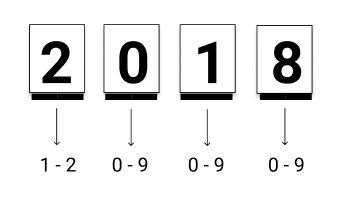

* The first digit can be either 1 or 2, while the last three digits can be any number between 0 and 9.

* With regular expressions, we use the following syntax to indicate a character could be a range of numbers: `pattern = r"[0-9]"`

* And we use the following syntax to indicate a character could be a range of letters:
 * lowercase letters: `pattern1 = r"[a-z]"`
 * uppercase letters: `pattern2 = r"[A-Z]"`

* We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax: `pattern = r"[1-6][a-z][a-z]"`

* If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats: `pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"`

* Use the `Series.str.extract()` method to extract such patterns:

In [ ]:
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)

In [ ]:
years.value_counts()

* When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group.

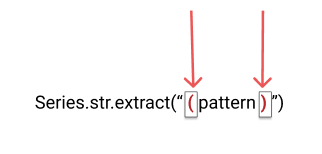

* If the capturing group doesn't exist in a row (or there is no match) the value in that row is set to `NaN` instead.

* The Series.str.extract() method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the `Series.str.extractall()` method.

* Let's make the results easier to read by using the df.set_index() method to set the Country column as the index: `merged = merged.set_index('Country')`

* Next, let's use the same regular expression from the last screen to extract all the years from the Special Notes column, except this time, we'll use a named capturing group. Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name: `(?P<Column_Name>...)`

* Below are the first five rows of the output:

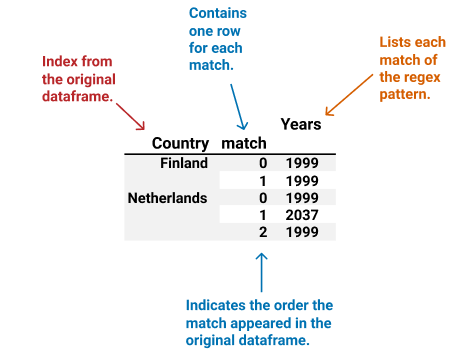

* Let's look at the IESurvey column next. This column has years in two different formats:

 * Integrated household survey (IHS), 2012
 * Integrated household survey (IHS), 2010/11

In [ ]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)

**Extracting More Than One Group of Patterns from a Series**

* When we tried to extract all of the years from the IESurvey column using the extractall method in the last exercise, we were unsuccessful because some of our years had the following format:

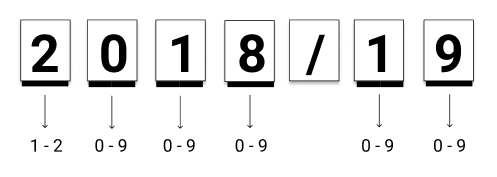

* Because our regular expression only accounted for the pattern highlighted below, we created a dataframe with just the first year in each row:

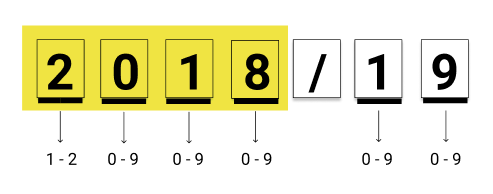

* If we wanted to extract the second, abbreviated year, we'd have to specify two more groups - one to extract the / and one to extract the last two digits.

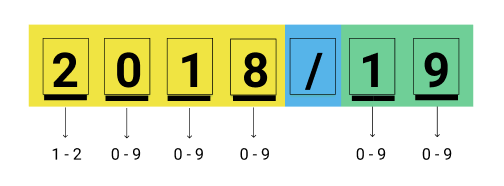

* Let's add those two groups to our regex and try to extract them again:

In [ ]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

* Note that we also added a question mark, **?**, after each of the two new groups **to indicate that a match for those groups is optional**. This allows us to extract years listed in the yyyy format AND the yyyy/yy format at once.

* The dataframe returned has three columns - one for each capturing group specified in pattern. Because we didn't name the second group, (/), the capturing group number, 1, was used as the column name.
* Now, we'll extract just the years from the IESurvey column. Then, we'll reformat the second year so that it contains all four digits of the year, not just the last two:

In [ ]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
# Notice that we didn't enclose /? in parentheses so that the resulting dataframe will only contain a First_Year and Second_Year column.
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

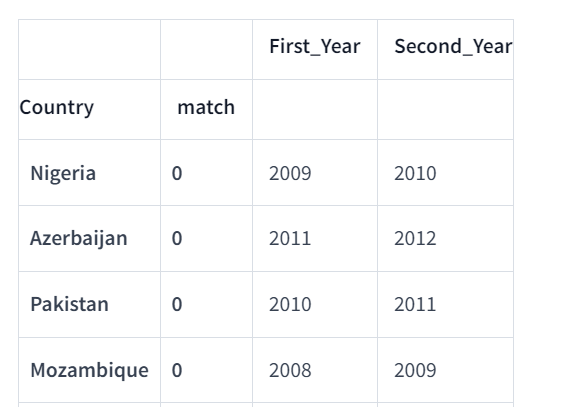

* Let's summarize what we learned about the Series.str.extractall() method and pandas string operations in the last exercise:

 * If part of the regex isn't grouped using parantheses, (), it won't be extracted.
 * When we add a string to a column using the plus sign, +, pandas will add that string to every value in the column. Note that the strings will be added together without any spaces.

* Cleaning the income group and plotting mean happiness score grouped by income group:

In [ ]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

## Working With Missing And Duplicate Data

* Missing or duplicate data may exist in a data set for a number of different reasons. Sometimes, missing or duplicate data is introduced as we perform cleaning and transformation tasks such as:
 * Combining data
 * Reindexing data
 * Reshaping data

* Other times, it exists in the original data set for reasons such as:
 * User input error
 * Data storage or conversion issues
* Using the `wh_201{}' for this section

* In pandas, missing values are generally represented by the NaN value, as seen in the dataframe above, or the None value.

* However, it's good to note that pandas will not automatically identify values such as `n/a`, `-`, or `--` as `NaN` or `None`, but they may also indicate data is missing.
* It's good to check for missing values before transforming data to make sure we don't unintentionally introduce missing values.

* If we do introduce missing values after transforming data, we'll have to determine if the data is really missing or if it's the result of some kind of error. As we progress through this lesson, we'll use the following workflow to clean our missing values, starting with checking for errors:

 * Check for errors in data cleaning/transformation.
 * Use data from additional sources to fill missing values.
 * Drop row/column.
 * Fill missing values with reasonable estimates computed from the available data.

In [ ]:
happiness2015 = pd.read_csv("wh_2015.csv")
happiness2016 = pd.read_csv("wh_2016.csv")
happiness2017 = pd.read_csv("wh_2017.csv")
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [ ]:
print(combined.isnull().sum())

* We can see above that our dataframe has many missing values and these missing values follow a pattern. Most columns fall into one of the following categories:

 * 177 missing values (about 1/3 of the total values)
 * 337 missing values (about 2/3 of the total values)

* You may have also noticed that some of the column names differ only by punctuation, which caused the dataframes to be combined incorrectly:
 * Trust (Government Corruption)
 * Trust..Government.Corruption.

In [ ]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

# removing paranthesis, no more than 2 empty spaces (using str.strip()), converting all to upper case
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()

* We can learn more about where these missing values are located by visualizing them with a heatmap, a graphical representation of our data in which values are represented as colors. We'll use the seaborn library to create the heatmap.

* Note below that we first reset the index to be the YEAR column so that we'll be able to see the corresponding year on the left side of the heatmap:

In [ ]:
import seaborn as sns
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False)
plt.show()

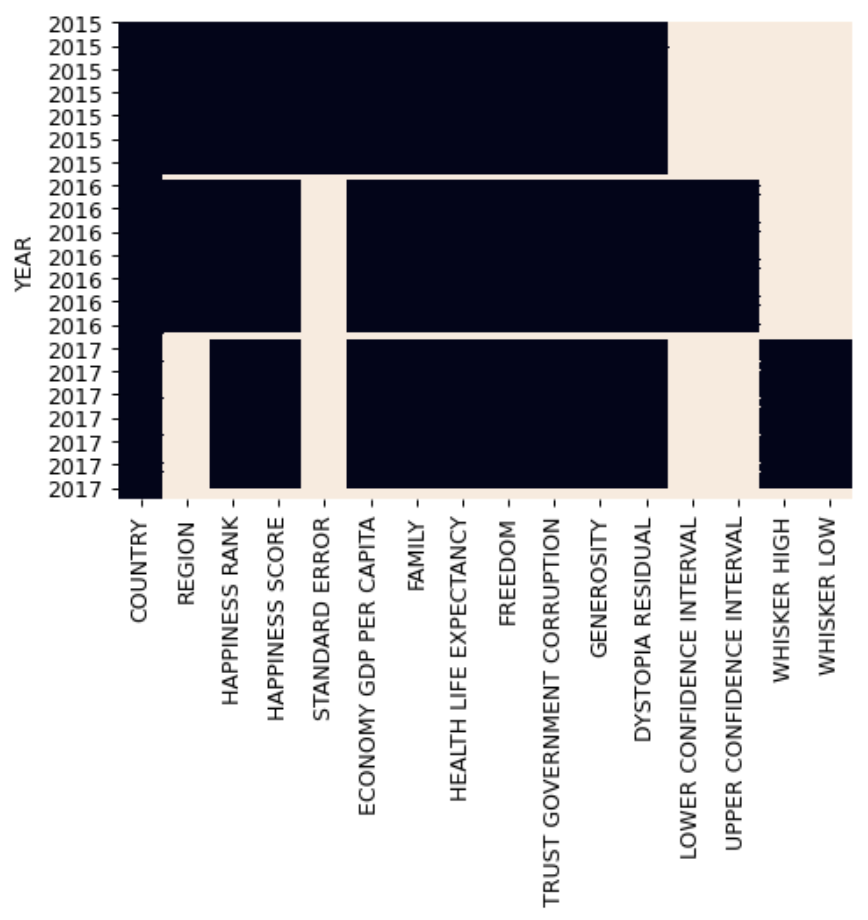

* To understand this visualization, imagine we took combined, highlighted missing values in light gray and all other values in black, and then shrunk it so that we could easily view the entire dataframe at once.

* Since we concatenated happiness2015, happiness2016, and happiness2017 by stacking them, note that the top third of the dataframe corresponds to the 2015 data, the second third corresponds to the 2016 data, and the bottom third corresponds to the 2017 data.

* We can make the following observations:

 * No values are missing in the COUNTRY column.
 * There are some rows in the 2015, 2016, and 2017 data with missing values in all columns EXCEPT the COUNTRY column.
 * Some columns only have data populated for one year.
 * It looks like the REGION data is missing for the year 2017.

In [ ]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

**Identifying Duplicates Values**

* Before we decide how to handle the rest of our missing values, let's first check our dataframe for duplicate rows.

* We'll use the `DataFrame.duplicated()` method to check for duplicate values. If no parameters are specified, the method will check for any rows in which all columns have the same values.

* Since we should only have one country for each year, we can be a little more thorough by defining rows with ONLY the same country and year as duplicates. To accomplish this, let's pass a list of the COUNTRY and YEAR column names into the `df.duplicated()` method:

In [ ]:
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined_dups = combined[dups]

* Since the dataframe is empty, we can tell that there are no rows with exactly the same country AND year.

* However, one thing to keep in mind is that the `df.duplicated()` method will only look for exact matches, so if the capitalization for country names isn't exactly the same, they won't be identified as duplicates. To be extra thorough, we can first standardize the capitalization for the COUNTRY column and then check for duplicates again.

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined_dups = combined[dups]

* We standardized the capitalization of the values in the COUNTRY column and identified that we actually do have three duplicate rows!

* Let's inspect all the rows for SOMALILAND REGION in combined.

In [ ]:
somaliland_combined = combined[combined['COUNTRY'] == 'SOMALILAND REGION']

* Now, we can see that there are two rows for 2015, 2016, and 2017 each.

* Next, let's use the `df.drop_duplicates()` method to drop the duplicate rows. Like the `df.duplicated()` method, the `df.drop_duplicates() method will define duplicates as rows in which all columns have the same values. We'll have to specify that rows with the same values in only the COUNTRY and YEAR columns should be dropped.

* It's also important to note that by default, the `drop_duplicates()` method will only keep the first duplicate row. To keep the last duplicate row, set the keep parameter to 'last'. Sometimes, this will mean sorting the dataframe before dropping the duplicate rows.

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()

combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

**Handle Missing Values by Dropping Columns**

* So far, to correct missing values we:

* Corrected the errors we made when combining our dataframes.
Used the 2015 and 2016 region values to fill in the missing regions for 2017.
* Many of the methods in pandas are designed to exclude missing values without removing them, so at this point, we could leave the rest of the missing values as is, depending on the question we're trying to answer.

* However, leaving missing values in the dataframe could cause issues with other transformation tasks and change the distribution of our data set. Also note that missing data has to be dropped or replaced to work with machine learning algorithms, so if you're interested in continuing in the data science path, it's important to know how to handle them.

In [ ]:
print(combined.isnull().sum())

* When deciding if you should drop a row or column, carefully consider whether you'll lose information that could alter your analysis. Instead of just saying, "If x percentage of the data is missing, we'll drop it.", it's better to also ask the following questions:

 * Is the missing data needed to accomplish our end goal?
 * How will removing or replacing the missing values affect our analysis?

* To answer the first question, let's establish our end goal:

 * End Goal: We want to analyze happiness scores and the factors that contribute to happiness scores by year and region.
* Since missing values make up more than half of the following columns and we don't need them to accomplish our end goal, we'll drop them:

 * STANDARD ERROR
 * LOWER CONFIDENCE INTERVAL
 * UPPER CONFIDENCE INTERVAL
 * WHISKER HIGH
 * WHISKER LOW

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

combined = combined.drop(columns_to_drop, axis = 1)
missing = combined.isnull().sum()

* However, as you start working with bigger datasets, it can sometimes be tedious to create a long list of column names to drop. Instead we can use the `DataFrame.dropna()` method to complete the same task.

* By default, the `dropna()` method will drop rows with any missing values. To drop columns, we can set the axis parameter equal to 1, just like with the `df.drop()` method:

* However, this would result in dropping columns with any missing values - we only want to drop certain columns. Instead, we can also use the `thresh` parameter to only drop columns if they contain below a certain number of non-null values.

* So far, we've used the `df.isnull()` method to confirm the number of missing values in each column. To confirm the number of values that are NOT missing, we can use the `DataFrame.notnull()` method:

In [ ]:
print(combined.notnull().sum().sort_values())

* Above, we can see that the columns we'd like to drop - LOWER CONFIDENCE INTERVAL, STANDARD ERROR, UPPER CONFIDENCE INTERVAL, WHISKER HIGH, and WHISKER LOW - only contain between 155 and 158 non null values.

* As a result, we'll set the thresh parameter equal to 159 in the `df.dropna()` method to drop them.

In [ ]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()

In [ ]:
print(combined.isnull().sum())

* To make a decision about how to handle the rest of the missing data, we'll analyze if it's better to just drop the rows or replace the missing values with other values.

Let's return to the following questions:

* Is the missing data needed to accomplish our end goal?
 * Yes, we need the data to accomplish our goal of analyzing happiness scores and contributing factors by region and year.
* How will removing or replacing the missing values affect our analysis? Let's break the second question down into a couple more specific questions:

 * What percentage of the data is missing?
 * Will dropping missing values cause us to lose valuable information in other columns?
 * Can we identify any patterns in the missing data?

* Question: What percentage of the data is missing?

 * As we saw when looking at the results of combined.isnull().sum() above, if missing values exist in a column of our dataframe, they account for about 4 percent of the total values (19 missing out of 489 values per column).

 * Generally speaking, the lower the percentage of missing values, the less likely dropping them will significantly impact the analysis.

* Question: Will dropping missing values cause us to lose valuable information in other columns?

 * To answer this question, let's visualize the missing data once more. Note below that before we create the heatmap, we first set the index of combined to the REGION column and sort the values:

In [ ]:
sorted = combined.set_index('REGION').sort_values(['REGION', 'HAPPINESS SCORE'])
sns.heatmap(sorted.isnull(), cbar=False)
plt.show()

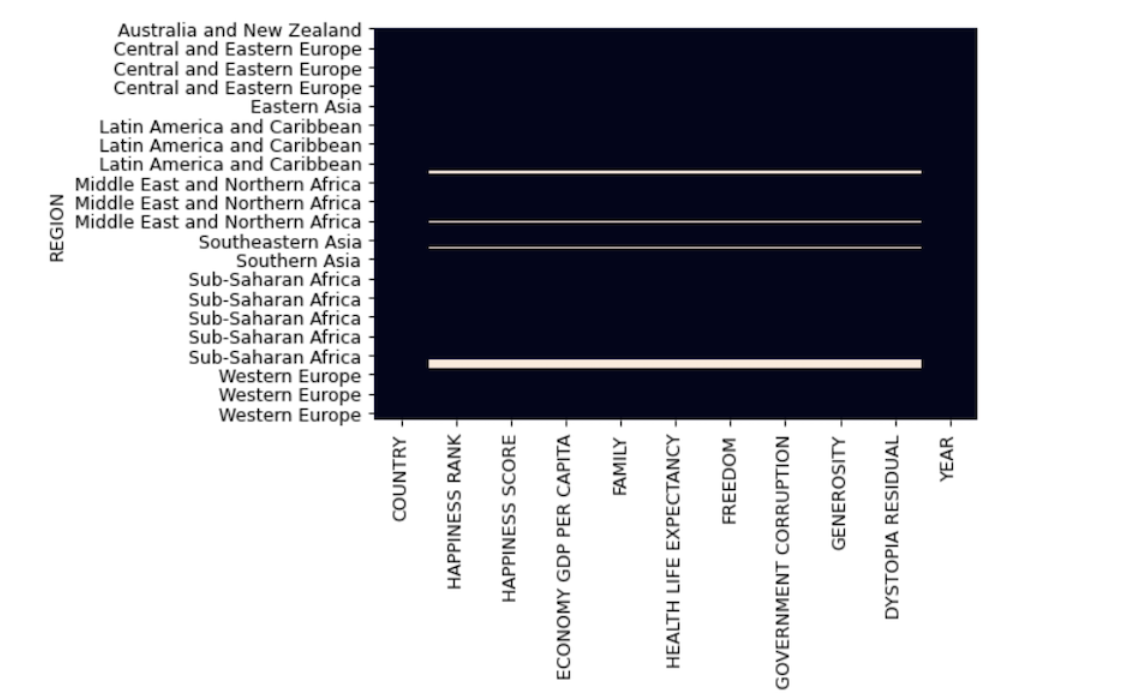

* As a reminder, in the heatmap above, the missing values are represented with light gray and all other values with black. From this visualization, we can confirm that if the data is missing, it's missing in almost every column. We'll conclude that dropping the missing values won't cause us to lose valuable information in other columns.

* Question: Can we identify any patterns in the missing data?

  From the visualization above, we can also identify that only three regions contain missing values:

 * Sub-Saharan Africa
 * Middle East and Northern Africa
 * Latin America and Carribbean

* The Sub-Saharan Africa region contains the most missing values, accounting for about 9 percent of that regions's values. Since we'd like to analyze the data according to region, we should also think about how these values impact the analysis for this region specifically.

* So far, we confirmed:

 * Only about 4 percent of the values in each column are missing.
 * Dropping rows with missing values won't cause us to lose information in other columns.
 * As a result, it may be best to drop the remaining missing values.

* However, before we make a decision, let's consider handling the missing values by replacing them with estimated values, also called imputation.

 * Check for errors in data cleaning/transformation.
 * Use data from additional sources to fill missing values.
 * Drop row/column.
 * *Fill missing values with reasonable estimates computed from the available data.*
* There are many options for choosing the replacement value, including:

 * A constant value
 * The mean of the column
 * The median of the column
 * The mode of the column
* For non-numeric columns, common replacement values include the most frequent value or a string like "Unknown" that is used to treat missing values as a separate category.

* For numeric columns, it's very common to replace missing values with the mean. Since the rest of the columns in combined with missing data are all numeric, we'll explore this option next.

First, let's build some intuition around this technique by analyzing how replacing missing values with the mean affects the distribution of the data. In order to do so, we'll use the `Series.fillna()` method to replace the missing values with the mean. Next, let's replace the missing happiness scores with the mean.

In [ ]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

* Previously, we confirmed that replacing missing values with the Series mean doesn't change the mean of the Series.

* If we were to plot the distributions before and after replacing the missing values with the mean, we'd see that the shape of the distribution changes as more values cluster around the mean. Note that the mean is represented with the red and green lines in the plots below:

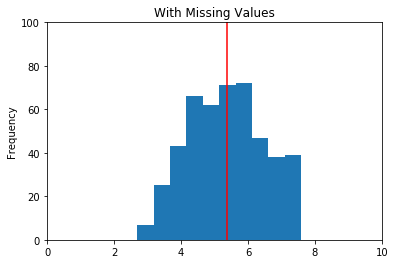

* As we decide to use this approach, we should ask the following questions - are the missing happiness scores likely to be close to the mean? Or is it more likely that the scores are very high or very low? If the missing values lie at extremes, the mean won't be a good estimate for them.

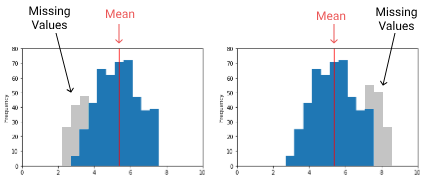

* Recall that when we visualized the missing data, we determined that the Sub-Saharan Africa region contained the most missing values. Since we'd like to analyze the data according to region, let's look more closely at the means for each region:

In [ ]:
pivot_table = combined.pivot_table(index='REGION', values='HAPPINESS SCORE', margins=True)

* As a reminder, the All row in the table above represents the mean happiness score for the whole world - the value that we used to replace our missing values. We can see that the world mean happiness score, 5.370728, is over 1 point higher than the mean happiness score for the Sub-Saharan Africa region, 4.150957.

* Also, if we think about the reasons why a country may not have participated in the happiness survey - war, natural disaster, etc - many of them would likely result in a lower happiness score than even the region's mean. We'll conclude that the mean for the whole world wouldn't be a good estimate for them.

* As a result, we'll decide that of these two options, it's better to drop the rows with missing values. Let's do that next.

In [ ]:
combined = combined.dropna()
missing = combined.isnull().sum()

## Regular Expression

**Dataset**

* Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "stories") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles; stories that make it to the top of Hacker News' listings can get hundreds of thousands of visitors.

* The dataset we will be working with is based off this CSV of Hacker News stories from September 2015 to September 2016. The columns in the dataset are explained below:

 * id: The unique identifier from Hacker News for the story
 * title: The title of the story
 * url: The URL that the stories links to, if the story has a URL
 * num_points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
 * num_comments: The number of comments that were made on the story
 * author: The username of the person who submitted the story
 * created_at: The date and time at which the story was submitted

* For teaching purposes, we have reduced the dataset from the almost 300,000 rows in its original form to approximately 20,000 rows by removing all submissions that did not receive any comments, and then randomly sampling from the remaining submissions.

In [ ]:
import pandas as pd

hn = pd.read_csv('/content/hacker_news.csv')

**Regular Expressions**

* When working with regular expressions, we use the term pattern to describe a regular expression that we've written. If the pattern is found within the string we're searching, we say that it has matched.

* As we previously learned, letters and numbers represent themselves in regular expressions. If we wanted to find the string "and" within another string, the regex pattern for that is simply and:

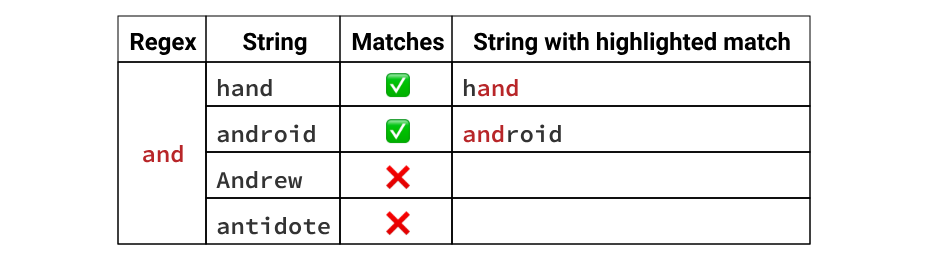

* In the third example above, the pattern and does not match Andrew because even though a and A are the same letter, the two characters are unique.

* We previously used regular expressions with pandas, but Python also has a built-in module for regular expressions: The `re` module. This module contains a number of different functions and classes for working with regular expressions. One of the most useful functions from the `re` module is the `re.search()` function, which takes two required arguments:

 * The regex pattern
 * The string we want to search that pattern for

In [ ]:
import re

m = re.search("and", "hand")
print(m)

<re.Match object; span=(1, 4), match='and'>


* The `re.search()` function will return a `Match` object if the pattern is found anywhere within the string. If the pattern is not found, `re.search()` returns None

In [ ]:
m = re.search("and", "antidote")
print(m)

# None

None


* We'll learn more about match objects later. For now, we can use the fact that the boolean value of a match object is True while None is False to easily check whether our regex matches each string in a list.

* We'll create a list of three simple strings to use while learning these concepts:

In [ ]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

pattern = "Blue"

for s in string_list:
    if re.search(pattern, s):
        print("Match")
    else:
        print("No Match")

Match
No Match
No Match


* So far, we haven't done anything with regular expressions that we couldn't do using the in keyword. The power of regular expressions comes when we use one of the special character sequences.

* The first of these we'll learn is called a set. A set allows us to specify two or more characters that can match in a single character's position.

* We define a set by placing the characters we want to match for in square brackets:

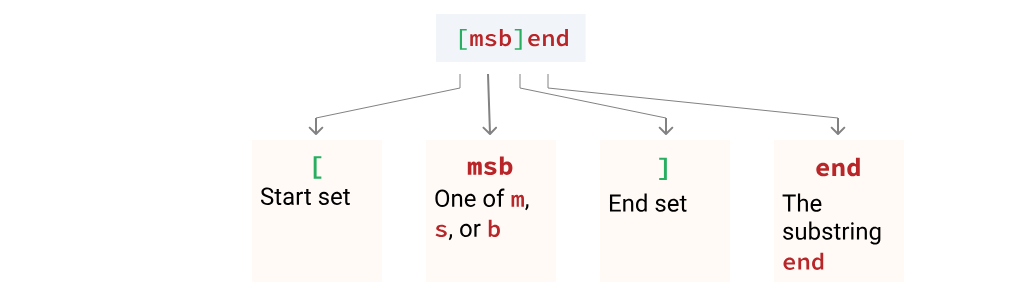

* The regular expression above will match the strings mend, send, and bend.

* Let's look at how we can add sets to match more of our example strings from earlier:

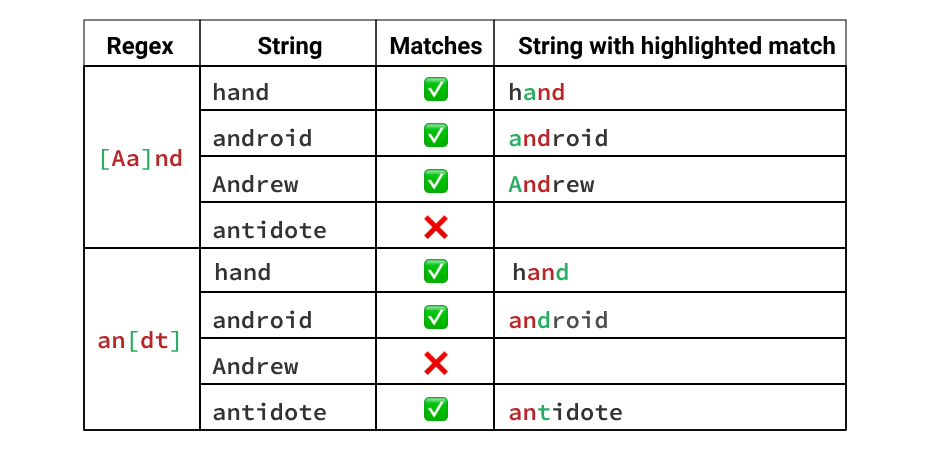

* Let's take another look at the list of strings we used earlier:

In [ ]:
string_list = ["Julie's favorite color is Blue.",
               "Keli's favorite color is Green.",
               "Craig's favorite colors are blue and red."]

* If you look closely, you'll notice the first string contains the substring Blue with a capital letter, where the third string contains the substring blue in all lowercase.

* We can use the set [Bb] for the first character so that we can match both variations, and then use that to count how many times Blue or blue occur in the list:

In [ ]:
blue_mentions = 0
pattern = "[Bb]lue"

for s in string_list:
    if re.search(pattern, s):
        blue_mentions += 1

print(blue_mentions)

2


In [ ]:
import re

titles = hn["title"].tolist()

python_mentions = 0
pattern = '[Pp]ython'

for title in titles:
    if re.search(pattern, title):
        python_mentions+=1

* We've learned that we should avoid using loops in pandas, and that vectorized methods are often faster and require less code.